# Laboratorio: Mejorando el Análisis de Sentimientos con LSTM y Características Adicionales

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

## Carga de datos

In [ ]:
print('Cargando los datos...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=50000)

Cargando los datos...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Pre-procesamiento

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen = 80)
X_test = sequence.pad_sequences(X_test, maxlen = 80)

## Modelo

In [ ]:
modelo = Sequential()
modelo.add(Embedding(20000, 128))
modelo.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Dropout, en la capa de entrada. Recurrent_dropout, en las capas recurrentes
modelo.add(Dense(1, activation='sigmoid'))

In [ ]:
modelo.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Entrenamiento y evaluación

In [ ]:
# Primero, ver si hay un GPU disponible y configurar el crecimiento de memoria para evitar problemas de memoria
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Actualmente, el crecimiento de memoraria necesita ser igual en todas las GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [ ]:
# Agregar detención temprana para monitorear el entrenamiento
detencion_temprana = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    verbose = 1
)

In [ ]:
historia = modelo.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 15,
    verbose = 1,
    validation_data = (X_test, y_test),
    callbacks = [detencion_temprana]
)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 299ms/step - accuracy: 0.7004 - loss: 0.5463 - val_accuracy: 0.8346 - val_loss: 0.3744
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 120s 308ms/step - accuracy: 0.8798 - loss: 0.2967 - val_accuracy: 0.8369 - val_loss: 0.3831
Epoch 3/15
 24/391 ━━━━━━━━━━━━━━━━━━━━ 1:23 228ms/step - accuracy: 0.9293 - loss: 0.1855

In [ ]:
# Después del entrenamiento se puede revisar el historial
print(historia.history.keys())

In [ ]:
perdida, exactitud = modelo.evaluate(X_test, y_test,
                            batch_size = 64,
                            verbose = 2)
print('Pérdida de la Prueba:', perdida)
print('Exactitud de la Prueba (Test accuracy):', exactitud)

# Arquitectura compleja

In [ ]:
from tensorflow.keras.layers import (Dropout, concatenate, BatchNormalization, Bidirectional)

# Modelo Sequential optimizado con arquitectura más compleja
modelo = Sequential()
modelo.add(Embedding(50000, 256))  # Vocabulario ampliado y embedding más grande
modelo.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))  # LSTM bidireccional
modelo.add(BatchNormalization())  # Normalización por lotes
modelo.add(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))  # Segunda capa LSTM
modelo.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))  # Tercera capa LSTM
modelo.add(Dense(64, activation='relu'))  # Primera capa densa
modelo.add(Dropout(0.5))  # Dropout fuerte
modelo.add(Dense(32, activation='relu'))  # Segunda capa densa
modelo.add(BatchNormalization())  # Normalización por lotes
modelo.add(Dropout(0.4))  # Dropout moderado
modelo.add(Dense(16, activation='relu'))  # Tercera capa densa
modelo.add(Dropout(0.3))  # Dropout ligero
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida

modelo.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', 'precision', 'recall'])

# Callbacks adicionales para mejor entrenamiento
reducir_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.0001,
    verbose=1
)

detencion_temprana = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

historia = modelo.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[detencion_temprana, reducir_lr]
)



Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 489s 1s/step - accuracy: 0.5390 - loss: 0.7680 - precision: 0.5403 - recall: 0.4655 - val_accuracy: 0.7593 - val_loss: 0.5034 - val_precision: 0.8104 - val_recall: 0.6769 - learning_rate: 0.0010
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.7690 - loss: 0.5062 - precision: 0.7766 - recall: 0.7581 - val_accuracy: 0.8113 - val_loss: 0.4259 - val_precision: 0.8591 - val_recall: 0.7448 - learning_rate: 0.0010
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.8619 - loss: 0.3496 - precision: 0.8670 - recall: 0.8548 - val_accuracy: 0.8158 - val_loss: 0.4229 - val_precision: 0.8334 - val_recall: 0.7895 - learning_rate: 0.0010
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.9077 - loss: 0.2574 - precision: 0.9115 - recall: 0.9026 - val_accuracy: 0.8158 - val_loss: 0.4206 - val_precision: 0.8524 - val_recall: 0.7640 - learning_rate: 0.0010
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accur

In [ ]:
modelo.save("Analisis_Sentimiento.keras")

In [ ]:


# Después del entrenamiento se puede revisar el historial
print(historia.history.keys())

perdida, exactitud = modelo.evaluate(X_test, y_test,
                            batch_size = 64,
                            verbose = 2)
print('Pérdida de la Prueba:', perdida)
print('Exactitud de la Prueba (Test accuracy):', exactitud)

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])


KeyboardInterrupt: 

NameError: name 'historia' is not defined

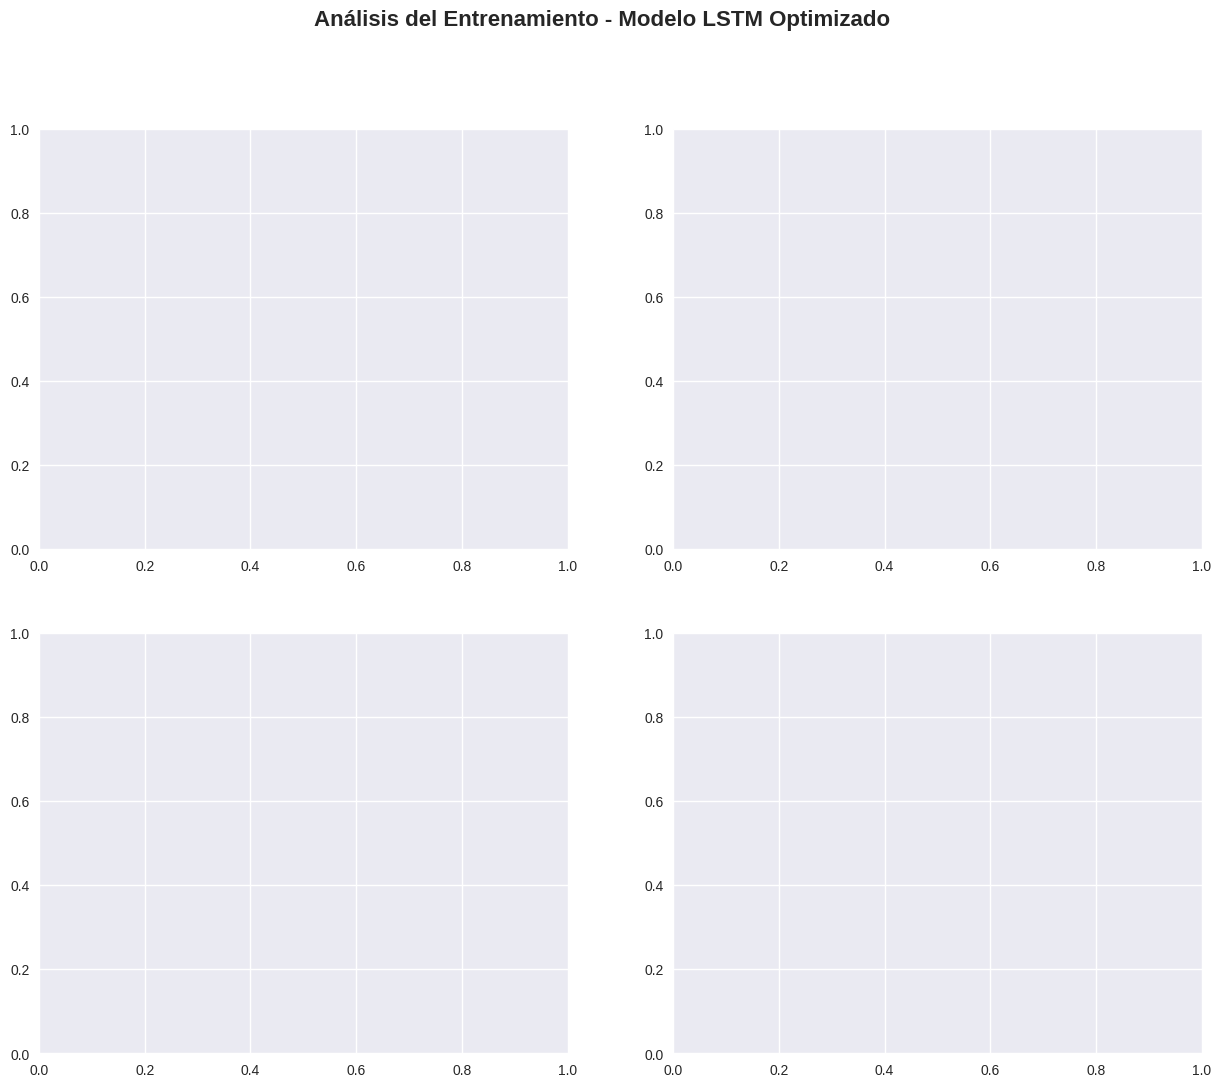

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis del Entrenamiento - Modelo LSTM Optimizado', fontsize=16, fontweight='bold')

# 1. Gráfica de Pérdida (Loss)
axes[0, 0].plot(historia.history['loss'], 'b-', linewidth=2, label='Pérdida Entrenamiento', marker='o', markersize=3)
axes[0, 0].plot(historia.history['val_loss'], 'r-', linewidth=2, label='Pérdida Validación', marker='s', markersize=3)
axes[0, 0].set_title('Evolución de la Pérdida', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Épocas')
axes[0, 0].set_ylabel('Pérdida (Binary Crossentropy)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Gráfica de Precisión (Accuracy)
axes[0, 1].plot(historia.history['accuracy'], 'b-', linewidth=2, label='Precisión Entrenamiento', marker='o', markersize=3)
axes[0, 1].plot(historia.history['val_accuracy'], 'r-', linewidth=2, label='Precisión Validación', marker='s', markersize=3)
axes[0, 1].set_title('Evolución de la Precisión', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Épocas')
axes[0, 1].set_ylabel('Precisión (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Gráfica de Precision (Métrica)
axes[1, 0].plot(historia.history['precision'], 'g-', linewidth=2, label='Precision Entrenamiento', marker='o', markersize=3)
axes[1, 0].plot(historia.history['val_precision'], 'orange', linewidth=2, label='Precision Validación', marker='s', markersize=3)
axes[1, 0].set_title('Evolución de Precision', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Épocas')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Gráfica de Recall
axes[1, 1].plot(historia.history['recall'], 'purple', linewidth=2, label='Recall Entrenamiento', marker='o', markersize=3)
axes[1, 1].plot(historia.history['val_recall'], 'brown', linewidth=2, label='Recall Validación', marker='s', markersize=3)
axes[1, 1].set_title('Evolución de Recall', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Épocas')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfica adicional: Comparación de métricas finales
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))

# Obtener los valores finales
metricas_entrenamiento = [
    historia.history['accuracy'][-1],
    historia.history['precision'][-1],
    historia.history['recall'][-1]
]

metricas_validacion = [
    historia.history['val_accuracy'][-1],
    historia.history['val_precision'][-1],
    historia.history['val_recall'][-1]
]

# Calcular F1-Score
f1_train = 2 * (historia.history['precision'][-1] * historia.history['recall'][-1]) / (historia.history['precision'][-1] + historia.history['recall'][-1])
f1_val = 2 * (historia.history['val_precision'][-1] * historia.history['val_recall'][-1]) / (historia.history['val_precision'][-1] + historia.history['val_recall'][-1])

metricas_entrenamiento.append(f1_train)
metricas_validacion.append(f1_val)

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.35

bars1 = ax2.bar(x - width/2, metricas_entrenamiento, width, label='Entrenamiento', color='skyblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, metricas_validacion, width, label='Validación', color='lightcoral', alpha=0.8)

# Añadir valores en las barras
def agregar_valores(bars):
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

agregar_valores(bars1)
agregar_valores(bars2)

ax2.set_xlabel('Métricas')
ax2.set_ylabel('Valores')
ax2.set_title('Comparación Final de Métricas - Modelo LSTM Optimizado', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

# Gráfica de Learning Rate (si se usó ReduceLROnPlateau)
if 'lr' in historia.history:
    fig3, ax3 = plt.subplots(1, 1, figsize=(10, 5))
    ax3.plot(historia.history['lr'], 'g-', linewidth=2, marker='o', markersize=4)
    ax3.set_title('Evolución del Learning Rate', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Épocas')
    ax3.set_ylabel('Learning Rate')
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Resumen estadístico
print("="*60)
print("RESUMEN DE ENTRENAMIENTO - MODELO LSTM OPTIMIZADO")
print("="*60)
print(f"Épocas entrenadas: {len(historia.history['loss'])}")
print(f"Mejor pérdida de validación: {min(historia.history['val_loss']):.4f}")
print(f"Mejor accuracy de validación: {max(historia.history['val_accuracy']):.4f}")
print(f"Precision final (validación): {historia.history['val_precision'][-1]:.4f}")
print(f"Recall final (validación): {historia.history['val_recall'][-1]:.4f}")
print(f"F1-Score final (validación): {f1_val:.4f}")

# Detectar overfitting
diferencia_loss = historia.history['loss'][-1] - historia.history['val_loss'][-1]
diferencia_acc = historia.history['accuracy'][-1] - historia.history['val_accuracy'][-1]

print("\n" + "="*60)
print("ANÁLISIS DE OVERFITTING")
print("="*60)
print(f"Diferencia Loss (train - val): {diferencia_loss:.4f}")
print(f"Diferencia Accuracy (train - val): {diferencia_acc:.4f}")

if abs(diferencia_loss) > 0.1 or abs(diferencia_acc) > 0.05:
    print("⚠️  POSIBLE OVERFITTING DETECTADO")
    print("Recomendaciones:")
    print("- Aumentar Dropout")
    print("- Reducir épocas")
    print("- Aumentar datos de entrenamiento")
else:
    print("✅ MODELO BIEN BALANCEADO")
    print("El modelo generaliza correctamente")

print("="*60)